<a href="https://colab.research.google.com/github/JSEFERINO/JSEFERINO/blob/main/DOEJH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño Factorial: Dos factores**
## *Importar las librerías*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
!pip install bioinfokit

In [ ]:
from bioinfokit.analys import stat

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot


# **Ejemplo 1**
## Una empresa de materiales de construcción quiere estudiar la influencia que tienen el grosor y el tipo de templado sobre la resistencia máxima de unas láminas de acero. Para ello miden el estrés hasta la rotura (variable cuantitativa dependiente) para dos tipos de templado (lento y rápido) y tres grosores de lámina (8mm, 16mm y 24 mm).

### Nota: con el objetivo de simplificar el ejemplo, se asume que se cumplen las condiciones para un ANOVA de dos vías. En un caso real, siempre hay que validar las condiciones sobre las que se apoya un método o técnica.

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

# Datos

In [ ]:
resistencia = [15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85,
               16.35, 17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73,
               13.02, 12.05, 12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82,
               12.49, 13.55, 14.53]

templado = ["rapido"] * 15 + ["lento"] * 15

grosor = ([8] * 5 + [16] * 5 + [24] * 5) * 2

datos = pd.DataFrame({    'templado': templado,    'grosor': grosor,    'resistencia': resistencia})

In [ ]:
datos

,templado,grosor,resistencia
0,rapido,8,15.29
1,rapido,8,15.89
2,rapido,8,16.02
3,rapido,8,16.56
4,rapido,8,15.46
5,rapido,16,16.91
6,rapido,16,16.99
7,rapido,16,17.27
8,rapido,16,16.85
9,rapido,16,16.35


# Análisis descriptivo y gráfico


- En primer lugar, se generan los diagramas Box-plot para identificar posibles diferencias notables, asimetrías, valores atípicos y homogeneidad de varianza entre los distintos niveles. Se calcula también la media y varianza de cada grupo.

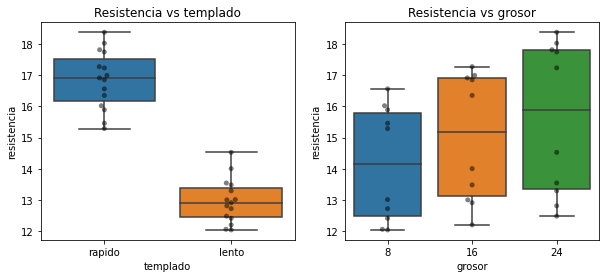

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Resistencia vs templado')
sns.boxplot(x="templado", y="resistencia", data=datos, ax=axs[0])
sns.swarmplot(x="templado", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Resistencia vs grosor')
sns.boxplot(x="grosor", y="resistencia", data=datos, ax=axs[1])
sns.swarmplot(x="grosor", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

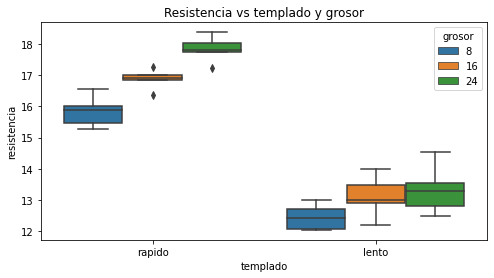

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Resistencia vs templado y grosor')
sns.boxplot(x="templado", y="resistencia", hue='grosor', data=datos, ax=ax);

In [ ]:
print('Resistencia media y desviación típica por templado')
datos.groupby('templado')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado


,mean,std
templado,,
lento,12.974667,0.711345
rapido,16.850667,0.927643


In [ ]:
print('Resistencia media y desviación típica por grosor')
datos.groupby('grosor')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por grosor


,mean,std
grosor,,
8,14.151,1.836993
16,15.001,2.036797
24,15.586,2.442354


In [ ]:
print('Resistencia media y desviación típica por templado y grosor')
datos.groupby(['templado', 'grosor'])['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado y grosor


mean       std
templado grosor                  
lento    8       12.458  0.420797
         16      13.128  0.672473
         24      13.338  0.783371
rapido   8       15.844  0.500030
         16      16.874  0.334186
         24      17.834  0.417169

# Análisis descriptivo y gráfico

- A partir de la representación gráfica y el cálculo de las medias se puede intuir que existe una diferencia en la resistencia alcanzada dependiendo del tipo de templado. La resistencia parece incrementarse a medida que aumenta el grosor de la lámina, si bien no está claro que la diferencia en las medias sea significativa. La distribución de las observaciones de cada nivel parece simétrica sin presencia de valores atípicos. A priori, parece que se satisfacen las condiciones necesarias para un ANOVA.

- Otra forma de identificar de forma gráfica posibles interacciones entre los dos factores es mediante lo que se conocen como “gráficos de interacción”. Si las líneas que describen los datos para cada uno de los niveles son paralelas, significa que el comportamiento es similar independientemente del nivel del factor, es decir, no hay interacción.

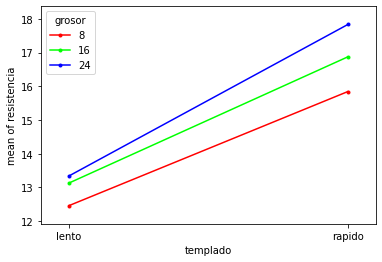

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.templado,
    trace    = datos.grosor,
    response = datos.resistencia,
    ax       = ax,
)

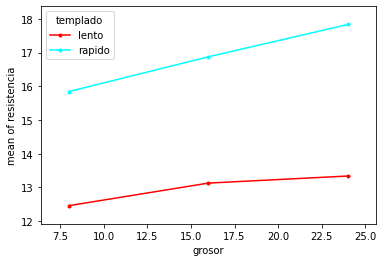

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.grosor,
    trace    = datos.templado,
    response = datos.resistencia,
    ax       = ax,
)

El primer gráfico de interacción parece indicar que el incremento de resistencia entre los dos tipos de templado es proporcional para los tres grosores. En el segundo gráfico, se observa cierta desviación en el grosor de 24mm. Esto podría deberse a simple variabilidad o porque existe interacción entre las variables grosor y templado. Estos indicios serán confirmados o descartados mediante el ANOVA.

# Test ANOVA


In [ ]:
import pingouin as pg

In [ ]:
pg.anova(
    data     = datos,
    dv       = 'resistencia',
    between  = ['templado', 'grosor'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,templado,112.6753,1,112.6753,380.0820,0.0000,0.9406
1,grosor,10.4132,2,5.2066,17.5631,0.0000,0.5941
2,templado * grosor,1.6035,2,0.8018,2.7045,0.0873,0.1839
3,Residual,7.1148,24,0.2964,NaN,NaN,NaN
